# Projeto: Ligações para o 911

Para este projeto estaremos analisando alguns dados de chamadas para o 911 do [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Os dados contém os seguintes campos:

* lat: Variável String, Latitude
* lng: Variável String, Longitude
* desc: Variável String, Descrição da Chamada de Emergência
* zip: Variável String, CEP
* título: Variável String, Título
* timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
* twp: Variável String, Township
* addr: Variável String, Endereço
* e: Variável String, variável Dummy (sempre 1)

Simplesmente acompanhe este notebook e tente completar as instruções ou responder as perguntas em negrito usando suas habilidades Python e Data Science!

## Dados e Configuração

** Importar numpy e pandas **

In [1]:
import pandas as pd
import numpy as np

** Importe as bibliotecas de visualização e configure% matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Leia o arquivo csv como um dataframe chamado df **

In [3]:
df = pd.read_csv('911.csv')

** Verifique a info() do df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Verifique o cabeçalho do df **

In [158]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


## Perguntas básicas

** Quais são os top 5 CEPs nas chamadas 911? **

In [5]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** Quais são os 5 principais municípios nas chamadas 911? **

In [92]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Dê uma olhada na coluna 'title'. Quantos códigos de título exclusivos existem? **

In [7]:
df['title'].nunique()

110

In [8]:
len(df['title'].unique())

110

## Criando novos recursos

** Na coluna "title" existem "Razões / Departamentos" especificados antes do código do título. Estes são "EMS", "Fire" e "Traffic". Use .apply () com uma expressão lambda personalizada para criar uma nova coluna chamada "Razão" que contém esse valor de string. **

** Por exemplo, se o valor da coluna do título for EMS: BACK PAINS / BLESSOR, o valor da coluna Reason seria EMS. **

In [162]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

** Qual é o motivo mais comum para uma chamada do 911 com base nessa nova coluna? **

In [163]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Agora use Seaborn para criar um countplot de chamadas 911 baseadas nesta nova coluna. **

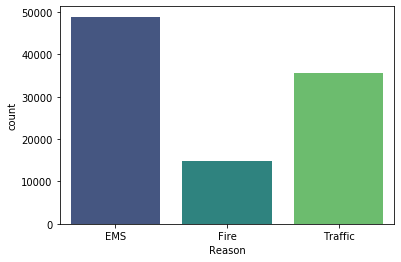

In [164]:
sns.countplot(x='Reason', data= df, palette='viridis' )

** Agora vamos começar a focar em informações de tempo. Qual é o tipo de dados dos objetos na coluna timeStamp? **

In [165]:
df_ems = df[ df['Reason'] == 'EMS'].copy()
df_ems['Reason'] = df_ems['title'].apply( lambda x: x.split(':')[1].strip())
df_ems['Reason'].value_counts().head(20)

RESPIRATORY EMERGENCY        5112
CARDIAC EMERGENCY            5012
FALL VICTIM                  4863
VEHICLE ACCIDENT             3935
SUBJECT IN PAIN              2687
HEAD INJURY                  2631
UNKNOWN MEDICAL EMERGENCY    1873
SYNCOPAL EPISODE             1717
SEIZURES                     1630
GENERAL WEAKNESS             1464
ABDOMINAL PAINS              1436
ALTERED MENTAL STATUS        1386
MEDICAL ALERT ALARM          1342
HEMORRHAGING                 1259
CVA/STROKE                   1202
OVERDOSE                     1191
NAUSEA/VOMITING              1131
UNCONSCIOUS SUBJECT          1115
DIABETIC EMERGENCY            836
DIZZINESS                     799
Name: Reason, dtype: int64

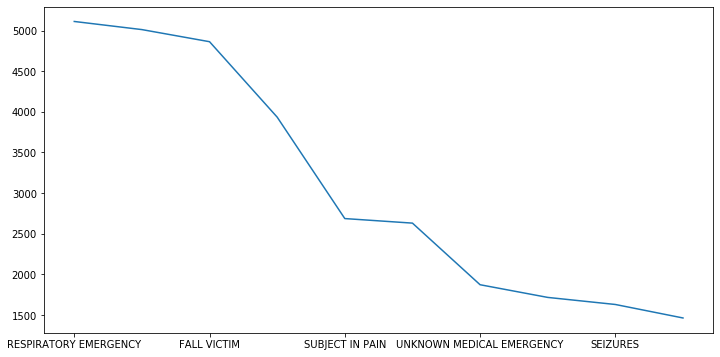

In [166]:
plt.figure( figsize=(12,6))
df_ems['Reason'].value_counts()[0:10].plot()

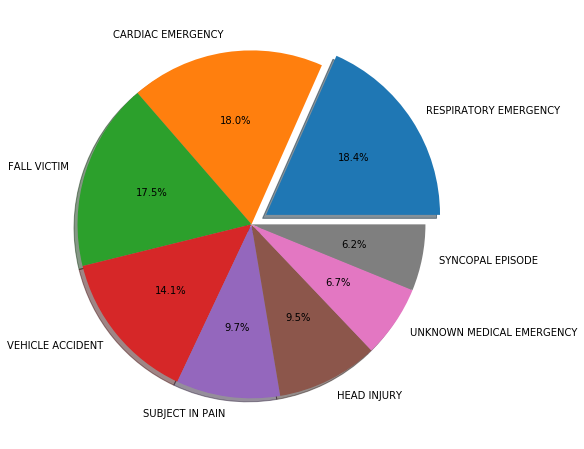

In [167]:
ems_index = df_ems['Reason'].value_counts().head(8).index
explode = (0.1, 0, 0, 0, 0,0,0,0 ) 
plt.figure( figsize=(15,8))

plt.pie(df_ems['Reason'].value_counts().head(8), labels= ems_index, explode= explode, autopct='%1.1f%%', shadow=True);


In [168]:
df_ems[df_ems['Reason'] == "RESPIRATORY EMERGENCY"]

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,RESPIRATORY EMERGENCY
16,40.243258,-75.286552,SUSQUEHANNA AVE & W MAIN ST; LANSDALE; Statio...,19446.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:46:01,LANSDALE,SUSQUEHANNA AVE & W MAIN ST,1,RESPIRATORY EMERGENCY
31,40.300736,-75.331973,CORNWALL TER & LIONS GATE CIR; FRANCONIA; Sta...,18964.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 18:12:01,FRANCONIA,CORNWALL TER & LIONS GATE CIR,1,RESPIRATORY EMERGENCY
66,40.119946,-75.338321,DEKALB ST & E ELM ST; NORRISTOWN; Station 308...,19401.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 19:27:02,NORRISTOWN,DEKALB ST & E ELM ST,1,RESPIRATORY EMERGENCY
69,40.245731,-75.341687,TOWAMENCIN AVE & SUMNEYTOWN PIKE; TOWAMENCIN;...,19438.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 19:47:01,TOWAMENCIN,TOWAMENCIN AVE & SUMNEYTOWN PIKE,1,RESPIRATORY EMERGENCY
...,...,...,...,...,...,...,...,...,...,...
99460,40.122127,-75.383994,OVERLOOK DR & S SCHUYLKILL AVE; WEST NORRITON...,19403.0,EMS: RESPIRATORY EMERGENCY,2016-08-24 09:27:01,WEST NORRITON,OVERLOOK DR & S SCHUYLKILL AVE,1,RESPIRATORY EMERGENCY
99461,40.214977,-75.499712,RIDGE PIKE & N TOWNSHIP LINE RD; LIMERICK; St...,19468.0,EMS: RESPIRATORY EMERGENCY,2016-08-24 09:27:01,LIMERICK,RIDGE PIKE & N TOWNSHIP LINE RD,1,RESPIRATORY EMERGENCY
99465,40.114928,-75.340307,AIRY ST & GREEN ST; NORRISTOWN; Station 308A;...,19401.0,EMS: RESPIRATORY EMERGENCY,2016-08-24 09:56:13,NORRISTOWN,AIRY ST & GREEN ST,1,RESPIRATORY EMERGENCY
99471,40.000763,-75.279769,WYNNEWOOD RD & W OLD WYNNEWOOD RD; LOWER MERI...,19096.0,EMS: RESPIRATORY EMERGENCY,2016-08-24 10:17:01,LOWER MERION,WYNNEWOOD RD & W OLD WYNNEWOOD RD,1,RESPIRATORY EMERGENCY


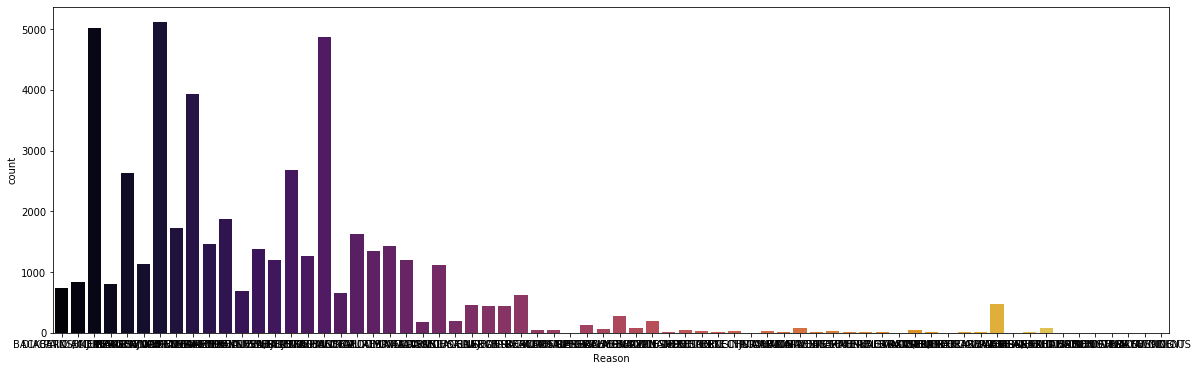

In [169]:
plt.figure( figsize=(20,6))
sns.countplot(x='Reason', data= df_ems, palette='inferno')

In [170]:
type(df['timeStamp'].iloc[0])

str

** Você deveria ter notado que esses timestamps ainda são strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) para converter a coluna de strings em objetos DateTime. **

In [171]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** Agora você pode pegar atributos específicos de um objeto Datetime chamando-os. Por exemplo:**

    time = df['timeStamp'].iloc[0]
    time.hour

** Você pode usar o método de consulta de funções do Jupyter (Tab) para explorar os vários atributos que você pode chamar. Agora que a coluna timestamp é realmente objetos DateTime, use .apply () para criar 3 novas colunas chamadas Hour, Month e Day of Week. Você criará essas colunas com base na coluna timeStamp, consulte as soluções se você ficar preso nesta etapa. **

In [172]:
df['Hour'] = df['timeStamp'].apply( lambda x: x.hour )
df['Month'] = df['timeStamp'].apply( lambda x: x.month )
df['DayOfWeek'] = df['timeStamp'].apply( lambda x: x.dayofweek )

** Observe como o dia da demana é um número inteiro de 0-6. Use o .map () com este dicionário para mapear os nomes das seqüências reais para o dia da semana: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [173]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [174]:
df['DayOfWeek'] = df['DayOfWeek'].map( dmap )

** Agora use Seaborn para criar um countplot da coluna "Day of Week" com a tonalidade baseada na coluna Reason. **

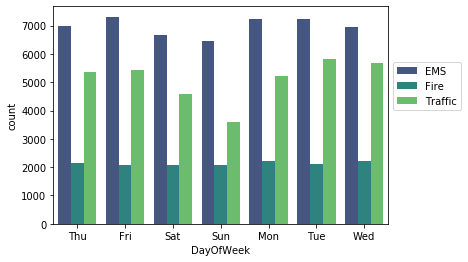

In [175]:
sns.countplot(x= 'DayOfWeek', data = df, hue='Reason', palette= 'viridis')
plt.legend(loc = 3, bbox_to_anchor=(1, 0.5) )

** Agora faça o mesmo para o mês: **

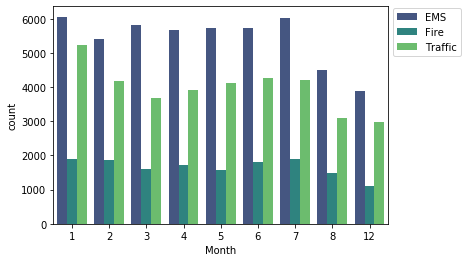

In [177]:
sns.countplot( x= 'Month', data = df , hue='Reason', palette= 'viridis')
plt.legend( loc=3, bbox_to_anchor = (1, .75))

** Você notou algo estranho no Plot? **

_____

** Você deve ter notado que estavam faltando alguns meses. Vejamos se podemos talvez preencher essa informação ao traçar as informações de outra forma, possivelmente um plot de linha simples que preencha os meses que faltam. Para fazer isso, precisamos trabalhar com pandas...

** Agora, crie um objeto groupby chamado "byMonth", onde você agrupa o DataFrame pela coluna do mês e use o método count() para agregação. Use o método head() neste DataFrame retornado. **

In [14]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,DayOfWeek
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Agora crie um plot simples fora do Dataframe indicando a contagem de chamadas por mês. **

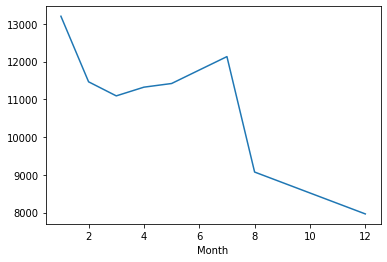

In [15]:
byMonth['twp'].plot()

** Agora veja se você pode usar o lmplot () do Seaborn para criar um modelo linear no número de chamadas por mês. Tenha em mente que talvez seja necessário resetar o índice em uma coluna. **

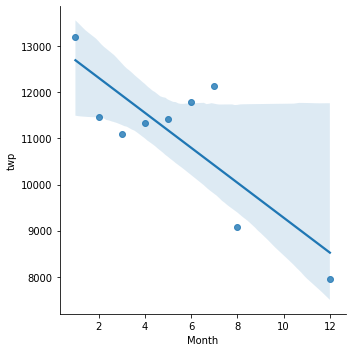

In [16]:
sns.lmplot( x='Month', y='twp', data= byMonth.reset_index())

** Crie uma nova coluna chamada 'Data' que contenha a data da coluna timeStamp. Você precisará usar .apply() junto com o método .date(). **

In [17]:
df['Data'] = df['timeStamp'].apply( lambda x: x.date())
df['Data'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Data, dtype: object

** Agora agrupe esta coluna Data com o groupby. Usando o count (), crie um gráfico de contagens de chamadas 911. **

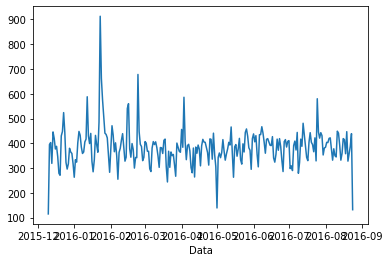

In [18]:
df.groupby('Data').count()['twp'].plot()

** Agora recrie esse plot, mas crie 3 plots separados com cada plot representando uma Razão para a chamada 911 **

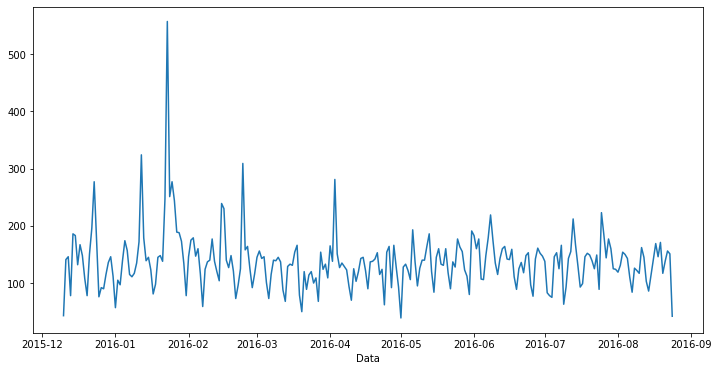

In [60]:
plt.figure(figsize=(12,6))
df[ df['Reason'] == 'Traffic'].groupby("Data").count()['twp'].plot()

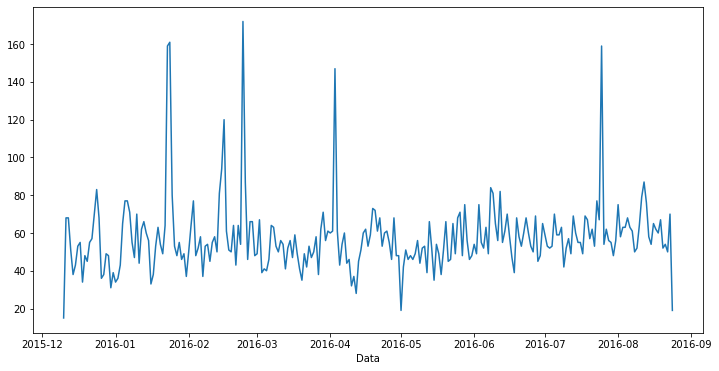

In [62]:
plt.figure(figsize=(12,6))
df[ df['Reason'] == 'Fire'].groupby('Data').count()['twp'].plot()

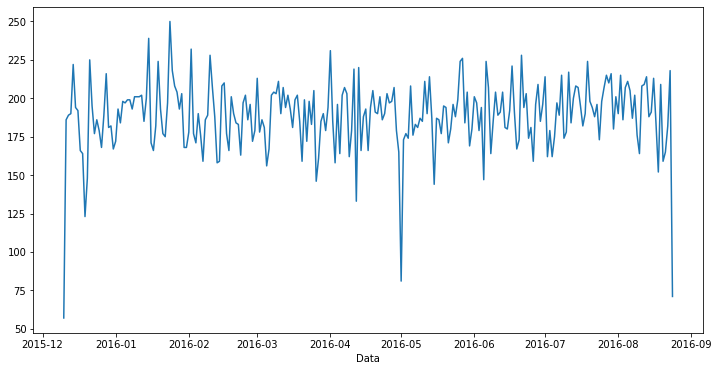

In [64]:
plt.figure(figsize=(12,6))
df[df["Reason"] == 'EMS'].groupby('Data').count()['twp'].plot()

____
** Agora vamos continuar a criar mapas de calor com seaborn e nossos dados. Em primeiro lugar, devemos reestruturar o quadro de dados para que as colunas se tornem horas e o Índice se torne o Dia da Semana. Há muitas maneiras de fazer isso, mas eu recomendaria tentar combinar groupby com o método [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) . Consulte as soluções se você ficar preso nisso! **

In [38]:
df_g = df.groupby(by=['DayOfWeek', 'Hour']).count()['Reason'].unstack()
df_g

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


** Agora crie um mapa de calor usando este DataFrame **

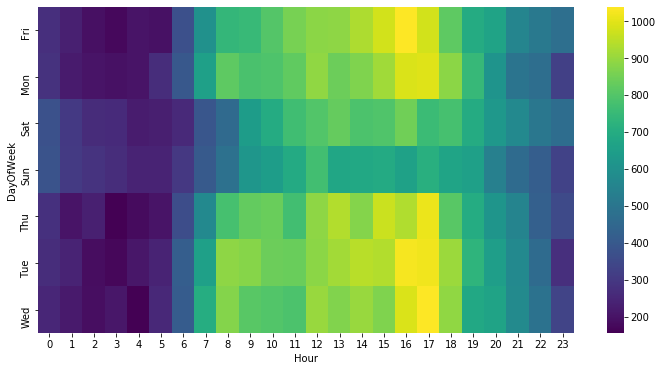

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap( df_g, cmap='viridis' )

** Agora crie um clustermap usando este DataFrame. **

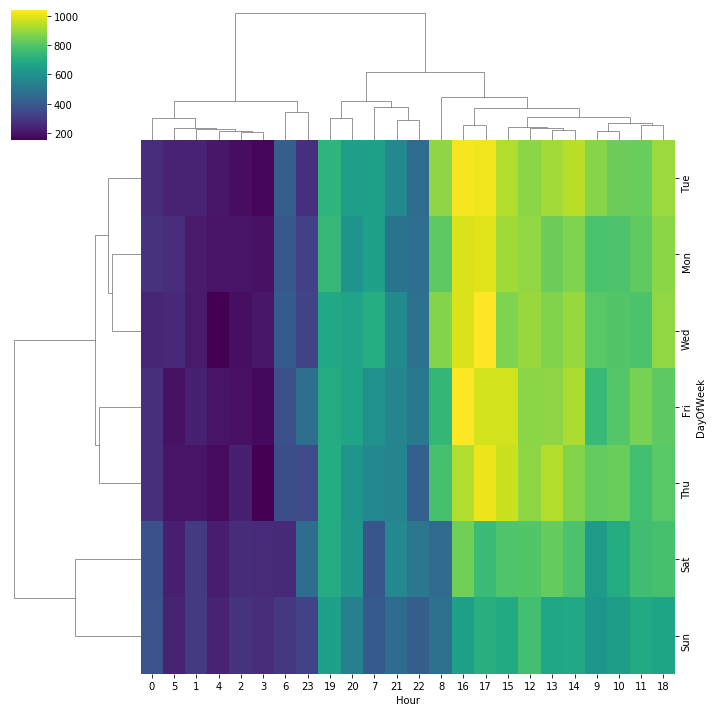

In [40]:
sns.clustermap(df_g, cmap='viridis')

** Agora repita estes mesmos plots e operações para um DataFrame que mostra o mês como a coluna. **

In [50]:
df_m = df.groupby(by=['Month','DayOfWeek']).count()['twp'].unstack()
df_m

DayOfWeek,Fri,Mon,Sat,Sun,Thu,Tue,Wed
Month,,,,,,,
1,1970,1727,2290,1960,1584,1973,1699
2,1581,1964,1440,1229,1596,1753,1902
3,1523,1533,1264,1100,1900,1884,1888
4,1958,1597,1732,1488,1601,1430,1517
5,1730,1779,1444,1422,1590,1917,1538
6,1649,1617,1388,1331,2065,1673,2054
7,2045,1692,1695,1672,1646,1668,1715
8,1310,1509,1099,1021,1227,1612,1295
12,1064,1256,978,907,1265,1233,1260


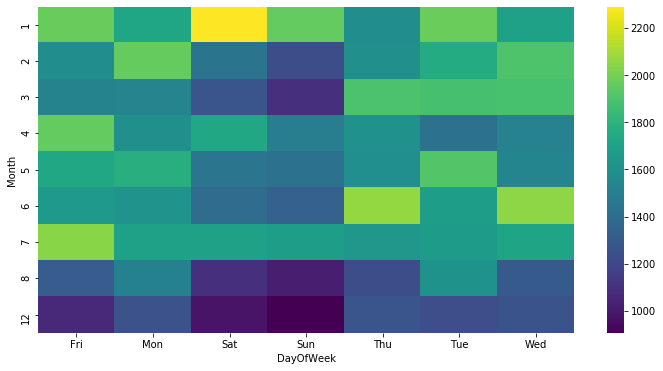

In [49]:
plt.figure(figsize=(12,6))
sns.heatmap(df_m, cmap='viridis')

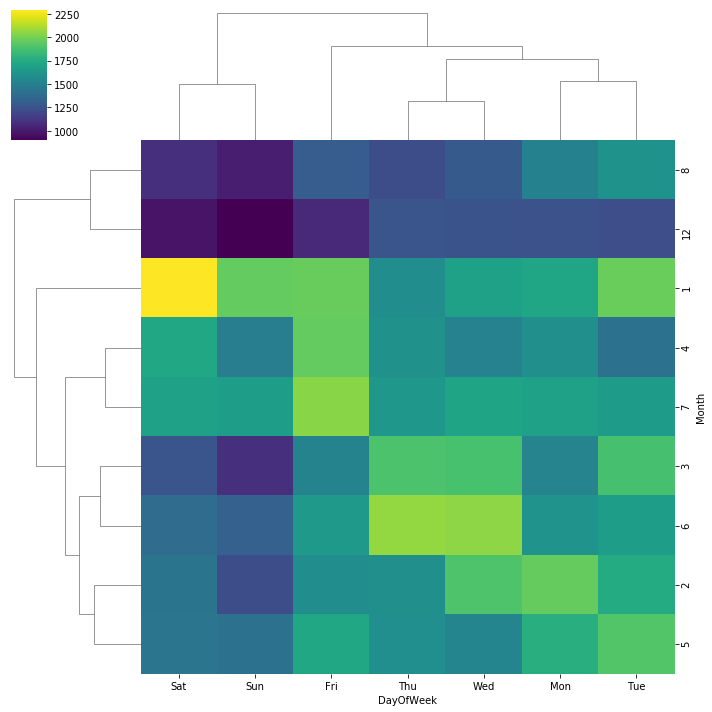

In [52]:
sns.clustermap(df_m, cmap='viridis')